In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
import numpy as np

DATA_FOLDER = "../DATA/"

In [2]:
train = pd.read_parquet(DATA_FOLDER + "RAW/train.parq").dropna().drop_duplicates()
train

,attack_time,watcher_country,watcher_as_num,watcher_as_name,attacker_country,attacker_as_num,attacker_as_name,attack_type,watcher_uuid_enum,attacker_ip_enum,label
0,2023-07-31 07:17:51+00:00,DE,34011.0,Host Europe GmbH,TR,47721.0,Murat Aktas,http:exploit,0,6466,0
1,2023-07-31 07:17:51+00:00,DE,34011.0,Host Europe GmbH,TR,47721.0,Murat Aktas,http:spam,0,6466,0
2,2023-07-31 07:17:49+00:00,DE,20886.0,bn:t Blatzheim Networks Telecom GmbH,DE,51167.0,Contabo GmbH,http:bruteforce,2,4637,0
3,2023-07-31 07:17:49+00:00,DE,20886.0,bn:t Blatzheim Networks Telecom GmbH,DE,51167.0,Contabo GmbH,http:spam,2,4637,0
4,2023-07-31 07:17:49+00:00,DE,20886.0,bn:t Blatzheim Networks Telecom GmbH,DE,51167.0,Contabo GmbH,http:exploit,2,4637,0
...,...,...,...,...,...,...,...,...,...,...,...
61629671,2023-08-24 21:14:59+00:00,US,22611.0,INMOTION,US,7018.0,ATT-INTERNET4,http:bruteforce,9606,191439,0
61629673,2023-08-24 21:14:59+00:00,US,22611.0,INMOTION,US,7018.0,ATT-INTERNET4,http:scan,9606,191439,0
61629674,2023-08-24 21:14:59+00:00,US,22611.0,INMOTION,US,7018.0,ATT-INTERNET4,http:exploit,9606,191439,0
61629681,2023-08-24 21:14:46+00:00,US,22612.0,NAMECHEAP-NET,US,23033.0,WOW,http:scan,40383,193446,0


In [3]:
train_type_label = train[["attack_type","label"]]
train_type_label = train_type_label.groupby('attack_type')['label'].value_counts().unstack().fillna(0)
train_type_label.columns

C:\Users\Francisco\AppData\Local\Temp\ipykernel_5588\2488901267.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_type_label = train_type_label.groupby('attack_type')['label'].value_counts().unstack().fillna(0)


Index([0, 1], dtype='int8', name='label')

In [4]:
train_type_label

label,0,1
attack_type,,
database:bruteforce,453,0
ftp:bruteforce,953,0
http:bruteforce,4134226,55476
http:crawl,82840,3905
http:exploit,7007330,139971
http:scan,9137861,177258
http:spam,12622254,251403
pop3/imap:bruteforce,429021,10287
sip:bruteforce,224941,2


In [5]:
train_type_label.index.name = 'attack_type'

melted_df = train_type_label.reset_index().melt(id_vars='attack_type', var_name='label', value_name='value')
melted_df

,attack_type,label,value
0,database:bruteforce,0,453
1,ftp:bruteforce,0,953
2,http:bruteforce,0,4134226
3,http:crawl,0,82840
4,http:exploit,0,7007330
5,http:scan,0,9137861
6,http:spam,0,12622254
7,pop3/imap:bruteforce,0,429021
8,sip:bruteforce,0,224941
9,smb:bruteforce,0,12415


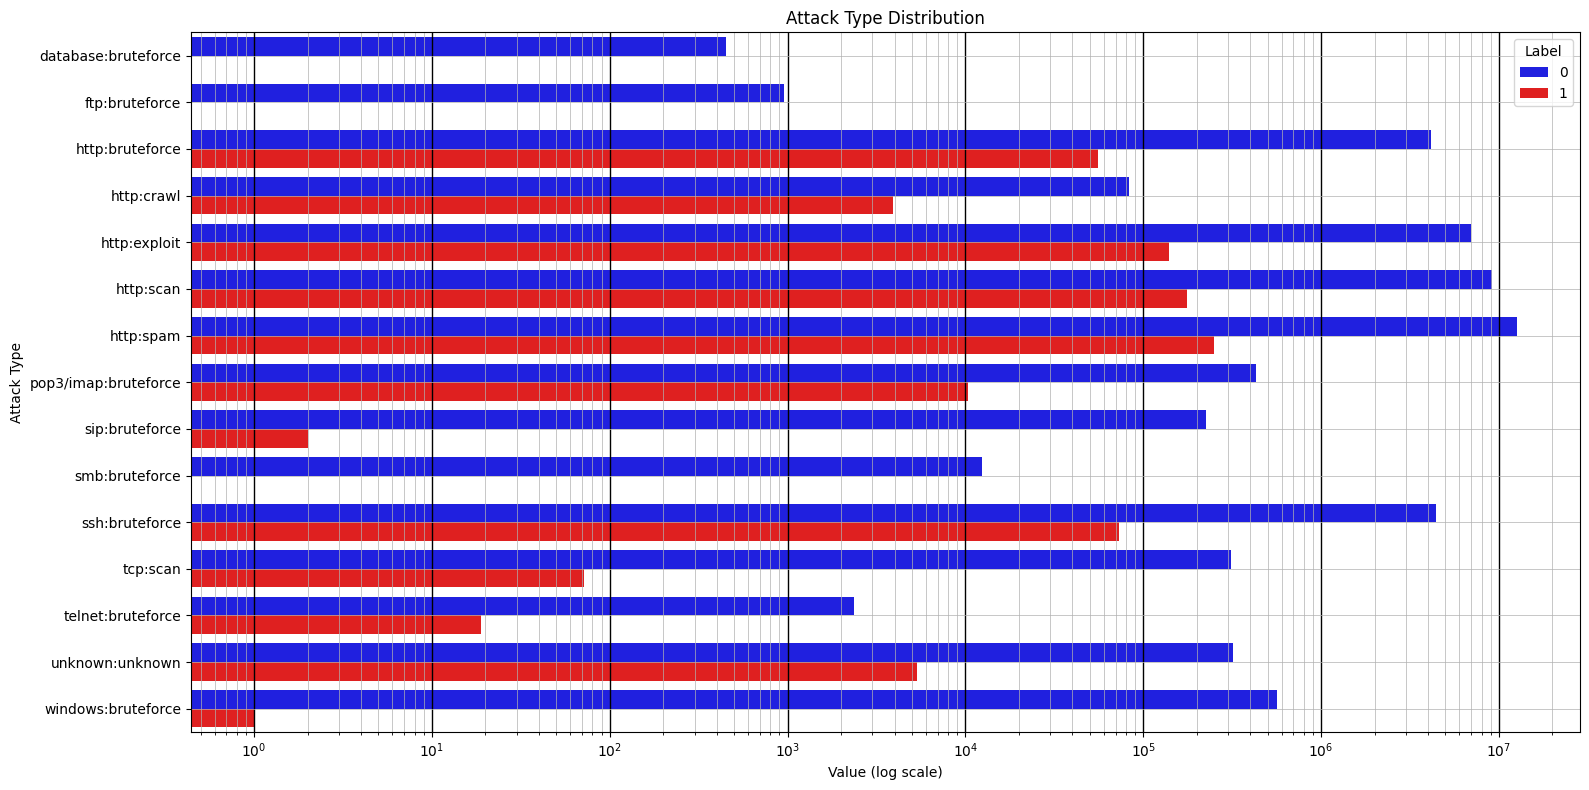

In [6]:
# Assuming 'label' has two categories, and you want to set custom colors
custom_colors = {'Label_1': 'blue', 'Label_2': 'red'}

plt.figure(figsize=(16, 8))
sns.set_palette(custom_colors.values())

# Use sns.barplot and store the axes for further customization
ax = sns.barplot(x='value', y='attack_type', hue='label', data=melted_df, errorbar=None)

# Customize grid lines
ax.grid(True, which='both', linestyle='-', linewidth=0.5)

plt.ylabel('Attack Type')
plt.xlabel('Value (log scale)')
plt.title('Attack Type Distribution')
plt.xscale('log')

# Add vertical grid lines on the x-axis
plt.gca().xaxis.grid(True, linestyle='-', linewidth=1, color="black")

# Add legend
plt.legend(title='Label')

plt.tight_layout()
plt.show()